In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [8]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1
#y : true_fun(X)에 노이즈를 추가한 값, 다항 회귀 모델이 예측해야하는 실제값

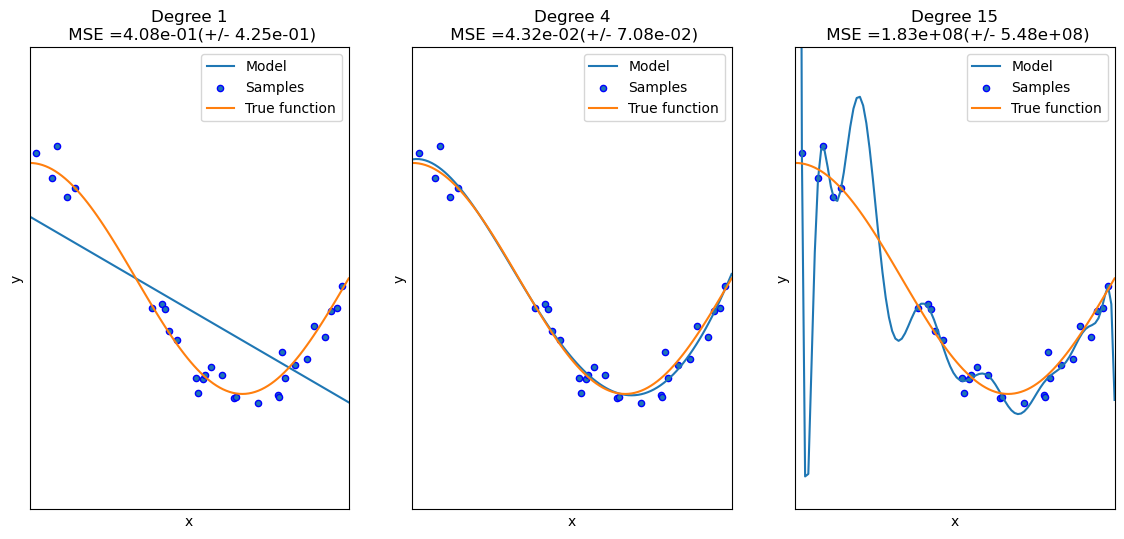

In [25]:
plt.figure(figsize=(14, 6))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks = (), yticks= ())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    #degree 매개변수로 다항식의 차수를 설정, include_bias : 편향 항 제외하고 다항 특성을 생성
    linear_regression = LinearRegression()
    #선형회귀모델 초기화
    pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    #Pipeline 설정, 연속된 작업을 수행시 사용(다항특성 변환후 선형회귀모델을 순차적으로 적용)
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv = 10)
    
    X_test = np.linspace(0, 1, 100)
    #0~1까지 범위에서 균일하게 간격을 둔 100개의 숫자로 이루어진 배열 생성
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #예측값은 다항 회귀모델에 의한 예측 결과
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    #데이터 포인트들을 산점도로 표시(X : 특성, y : 해당하는 실제값(타겟))
    plt.plot(X_test, true_fun(X_test), label = "True function")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
    "Degree {}\n MSE ={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [24]:
X_test = np.linspace(0, 1, 100)
print(X_test)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898